<a href="https://colab.research.google.com/github/Redwoods/pdm/blob/main/project/chest_xray/chest_xray_TL1_EfficientNetB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TL : EfficientNetB1
---

## Chest X-ray dataset
- NORMAL
- PNEUMONIA 

## dataset
- chest_xray_data/val/PNEUMONIA 8
- chest_xray_data/val/NORMAL 8
- chest_xray_data/test/PNEUMONIA 390
- chest_xray_data/test/NORMAL 234
- chest_xray_data/train/PNEUMONIA 3875
- chest_xray_data/train/NORMAL 1341

In [ ]:
# Down chest_xray_data.zip from Google drive
# https://drive.google.com/file/d/1rLbgIAsHLB-3OBR4mdhXQcBehz2qzVR2/view?usp=sharing
# !gdown https://drive.google.com/uc?id=1rLbgIAsHLB-3OBR4mdhXQcBehz2qzVR2

# Use this code when errors occur during downloading dataset.
# When the above link does not work due to virus checking, use one of the below methods to download dataset.
# !wget http://life21c.inje.ac.kr:3030/data/chest_xray_data.zip
!wget http://chaos.inje.ac.kr:3030/data/chest_xray_data.zip

--2022-11-30 04:24:44--  http://chaos.inje.ac.kr:3030/data/chest_xray_data.zip
Resolving chaos.inje.ac.kr (chaos.inje.ac.kr)... 203.241.251.51
Connecting to chaos.inje.ac.kr (chaos.inje.ac.kr)|203.241.251.51|:3030... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1225713864 (1.1G) [application/zip]
Saving to: ‘chest_xray_data.zip’

chest_xray_data.zip 100%[===================>]   1.14G  1006KB/s    in 22m 54s 

2022-11-30 04:47:39 (871 KB/s) - ‘chest_xray_data.zip’ saved [1225713864/1225713864]



In [ ]:
!unzip chest_xray_data.zip   # -d chest_xray_data


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: chest_xray_data/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0448-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0449-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0450-0001.jpeg  
  inflating: chest_

In [ ]:
!ls chest_xray_data

test  train  val


In [ ]:
import os
path = 'chest_xray_data'
# 서브 디렉토리별 파일 개수 출력
for root, subdirs, files in os.walk(path):
    if len(files) > 0:
        print(root, len(files))

chest_xray_data/train/PNEUMONIA 3875
chest_xray_data/train/NORMAL 1341
chest_xray_data/test/PNEUMONIA 390
chest_xray_data/test/NORMAL 234
chest_xray_data/val/PNEUMONIA 8
chest_xray_data/val/NORMAL 8


In [ ]:
# import
import matplotlib.pyplot as plt 
from matplotlib.image import imread
import tensorflow
from tensorflow.keras import models, layers


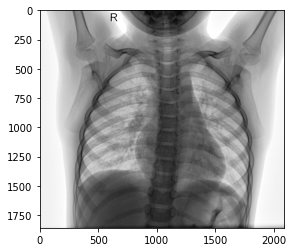

In [ ]:
# sample image
image = imread('chest_xray_data/train/NORMAL/IM-0115-0001.jpeg')
image.shape
plt.imshow(image, cmap='Greys')
plt.show()

Image shape: (1818, 2053)


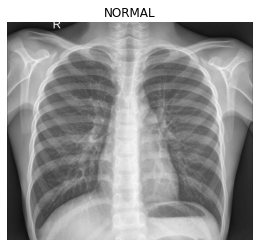

In [ ]:
# View a random image
train_dir = './chest_xray_data/train'
test_dir = './chest_xray_data/test'
validation_dir = './chest_xray_data/val'

import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+'/'+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img, cmap = "gray")
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

# classes = ['NORMAL', 'PNEUMONIA']
img = view_random_image(target_dir = test_dir, target_class = "NORMAL")
# img = tensorflow.constant(img)
plt.show()


---

## tensorflow dataset from local images

In [ ]:
## Setting up the data

## Set the image size 
IMG_SIZE = (224, 224)
batchSize = 32

print("Training Images:")
train_data = tensorflow.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                 image_size = IMG_SIZE,
                                                                 label_mode = "binary",
                                                                 color_mode = "grayscale",
                                                                 batch_size = batchSize)

print("Testing Images:")
test_data = tensorflow.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                 image_size = IMG_SIZE,
                                                                 label_mode = "binary",
                                                                 color_mode = "grayscale",
                                                                 batch_size = batchSize)

print("Validation Images:")
val_data = tensorflow.keras.preprocessing.image_dataset_from_directory(directory = validation_dir,
                                                                 image_size = IMG_SIZE,
                                                                 label_mode = "binary",
                                                                 color_mode = "grayscale",
                                                                 batch_size = batchSize)

Training Images:
Found 5216 files belonging to 2 classes.
Testing Images:
Found 624 files belonging to 2 classes.
Validation Images:
Found 16 files belonging to 2 classes.


In [ ]:
len(train_data),len(test_data),len(val_data)

(163, 20, 1)

In [ ]:
5216/32

163.0

In [ ]:
# Inspecting the train_data
train_data   # BatchDataset
# <BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 1), dtype=tf.float32, name=None), 
# TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>


<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

## Visualize images from dataset

(32, 224, 224, 1) tf.Tensor(
[[1.]
 [1.]
 [0.]
 [1.]
 [1.]], shape=(5, 1), dtype=float32)


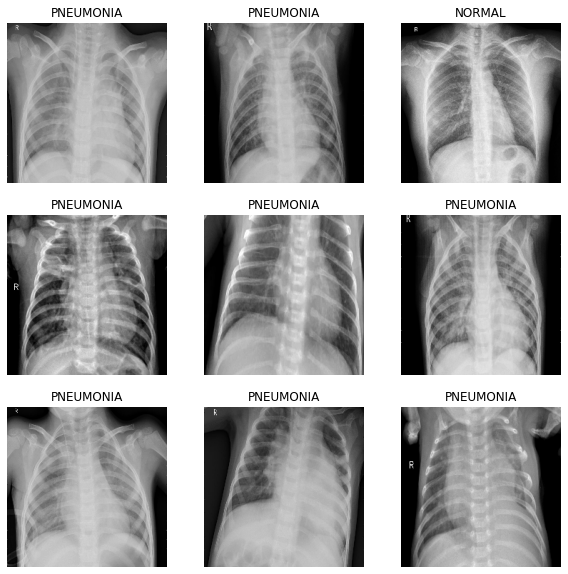

==================== Test dataset ====================
(32, 224, 224, 1) tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]
 [1.]], shape=(5, 1), dtype=float32)


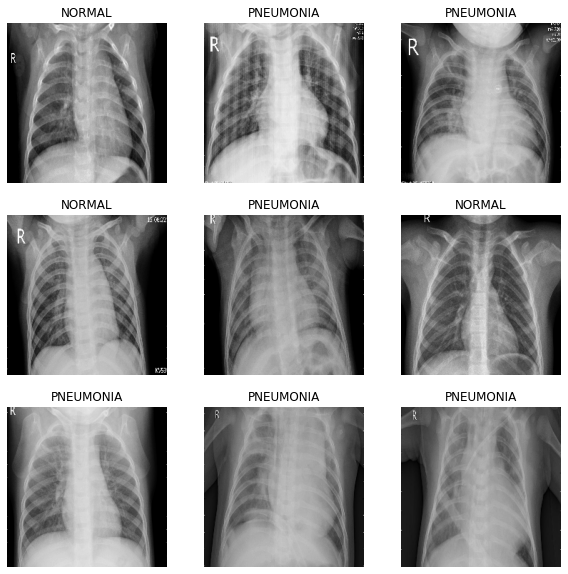

In [ ]:
# Plot images from dataset
# figure 크기를 조절합니다.
plt.figure(figsize=(10, 10))
names = ['NORMAL', 'PNEUMONIA']
# 배치 하나를 가져옵니다.
for images, labels in train_data.take(1):
    print(images.shape, labels[:5])
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i][:,:,0].numpy().astype("uint8"), cmap = "gray") #.numpy())
        plt.title(names[int(labels[i])])
        plt.axis("off")
plt.show()

# [DIY] Plot images from test dataset
print("="*20, 'Test dataset', "="*20)
plt.figure(figsize=(10, 10))
# names = ['NORMAL', 'PNEUMONIA']
# 배치 하나를 가져옵니다.
for images, labels in test_data.take(1):
    print(images.shape, labels[:5])
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i][:,:,0].numpy().astype("uint8"), cmap = "gray") #.numpy())
        plt.title(names[int(labels[i])])
        plt.axis("off")
plt.show()

## Data Augmentation

In [ ]:
#
# Data augmentation
#
# Create a data augmentation stage with horizontal flipping, rotations, zooms
#
tensorflow.get_logger().setLevel('ERROR')  # Clear warnings in data augmentation

from tensorflow import keras
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),  # Not compatible with model
  layers.RandomWidth(0.2),
  # layers.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")


### Visualize the augmented images

========================= Train dataset =========================
tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]], shape=(32, 1), dtype=float32) (32, 224, 224, 1)
(1, 200, 206, 1)
(1, 233, 258, 1)
(1, 233, 242, 1)
(1, 208, 201, 1)
(1, 195, 181, 1)
(1, 204, 198, 1)
(1, 255, 264, 1)
(1, 192, 267, 1)
(1, 263, 197, 1)


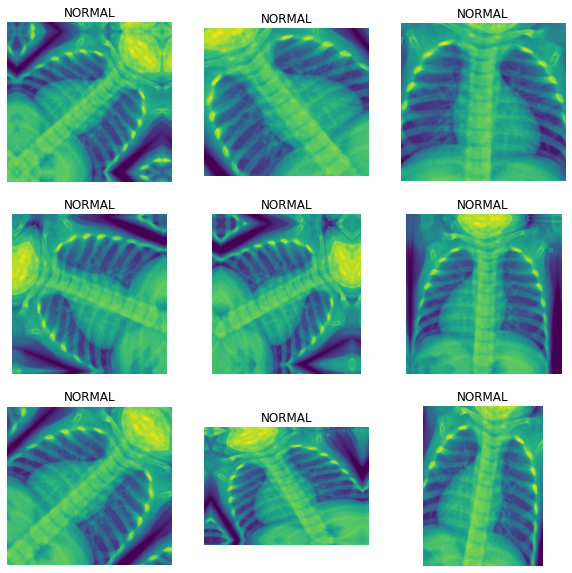

========================= Test dataset =========================
tf.Tensor(
[[0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]], shape=(32, 1), dtype=float32) (32, 224, 224, 1)
(1, 181, 209, 1)
(1, 234, 233, 1)
(1, 252, 234, 1)
(1, 258, 205, 1)
(1, 255, 188, 1)
(1, 200, 240, 1)
(1, 204, 250, 1)
(1, 256, 231, 1)
(1, 201, 236, 1)


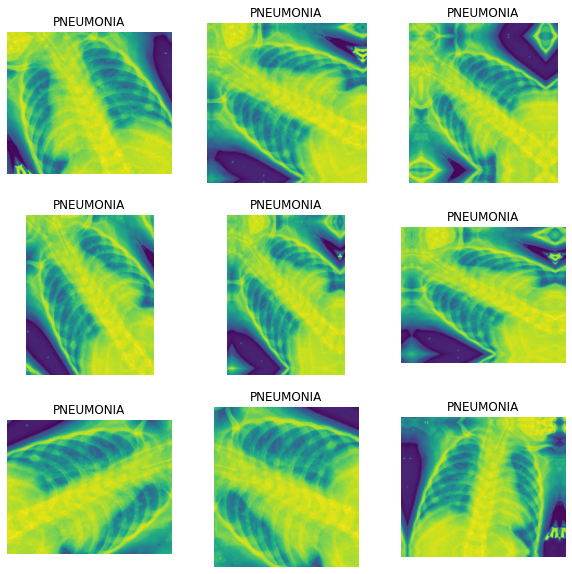

In [ ]:
#
# Visualize the augmented images
#
print("="*25, 'Train dataset', "="*25)
plt.figure(figsize=(10,10))
image_idx = 5
for images, labels in train_data.take(1):    # Make a batch of images & labels
    print(labels,images.shape)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        aug_img = data_augmentation(tensorflow.expand_dims(images[image_idx], axis=0))
        print(aug_img.shape)
        plt.imshow(aug_img[0][:,:,0].numpy().astype("uint8"))
        plt.title("{}".format(names[int(labels[image_idx])]))
        plt.axis("off")
    break
plt.show()

print("="*25, 'Test dataset', "="*25)
plt.figure(figsize=(10,10))
image_idx = 5
for images, labels in test_data.take(1):    # Make a batch of images & labels
    print(labels,images.shape)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        aug_img = data_augmentation(tensorflow.expand_dims(images[image_idx], axis=0))
        print(aug_img.shape)
        plt.imshow(aug_img[0][:,:,0].numpy().astype("uint8"))
        plt.title("{}".format(names[int(labels[image_idx])]))
        plt.axis("off")
    break
plt.show()

# Model: Transfer learning
- ## EfficientNetB1

In [ ]:
#
# Transfer learning
#
## Using the model EfficientNetB1 for the first experiment with all the layers trainable 
#
base_model = keras.applications.EfficientNetB1(include_top = False)
base_model.trainable = True 
# Check the input and output of the pretraioned model
print(base_model.input.shape)
print(base_model.output.shape)

for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.trainable, end=", ")


27018416/27018416 [==============================] - 0s 0us/step
(None, None, None, 3)
(None, None, None, 1280)
0 True, 1 True, 2 True, 3 True, 4 True, 5 True, 6 True, 7 True, 8 True, 9 True, 10 True, 11 True, 12 True, 13 True, 14 True, 15 True, 16 True, 17 True, 18 True, 19 True, 20 True, 21 True, 22 True, 23 True, 24 True, 25 True, 26 True, 27 True, 28 True, 29 True, 30 True, 31 True, 32 True, 33 True, 34 True, 35 True, 36 True, 37 True, 38 True, 39 True, 40 True, 41 True, 42 True, 43 True, 44 True, 45 True, 46 True, 47 True, 48 True, 49 True, 50 True, 51 True, 52 True, 53 True, 54 True, 55 True, 56 True, 57 True, 58 True, 59 True, 60 True, 61 True, 62 True, 63 True, 64 True, 65 True, 66 True, 67 True, 68 True, 69 True, 70 True, 71 True, 72 True, 73 True, 74 True, 75 True, 76 True, 77 True, 78 True, 79 True, 80 True, 81 True, 82 True, 83 True, 84 True, 85 True, 86 True, 87 True, 88 True, 89 True, 90 True, 91 True, 92 True, 93 True, 94 True, 95 True, 96 True, 97 True, 98 True, 99 True

In [ ]:
model = keras.Sequential([
  layers.Input(shape=(224,224,1),name='input_layer'),
  # layers.Rescaling(1./255),
  data_augmentation,
  base_model,
  layers.GlobalMaxPooling2D(name = "global_max"),
  layers.Dense(128,activation='relu'),
  layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation (Sequenti  (None, 224, 224, 1)      0         
 al)                                                             
                                                                 
 efficientnetb1 (Functional)  (None, None, None, 1280)  6575239  
                                                                 
 global_max (GlobalMaxPoolin  (None, 1280)             0         
 g2D)                                                            
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 6,739,336
Trainable params: 6,677,281
Non-

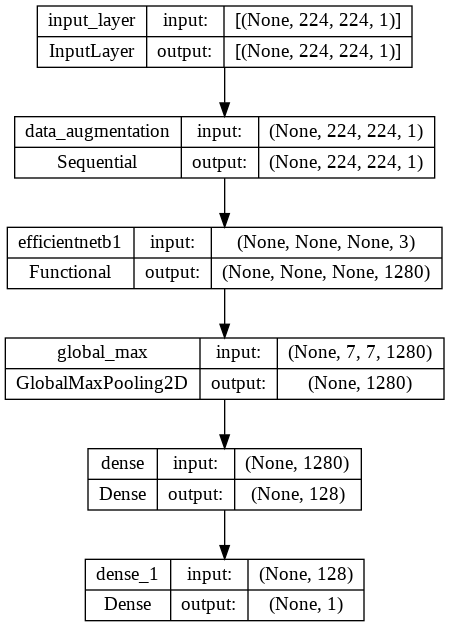

In [ ]:
# from tensorflow import keras
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
len(train_data),len(test_data)  # 5216/32, 624/32, batch_size=20

(163, 20)

# Building the Model

In [ ]:
# Setting up the callbacks
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=10) # if val loss decreases for 10 epochs in a row, stop training
# Creating learning rate reduction callback
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.25, # multiply the learning rate by 0.2 (reduce by 4x)
                                                 patience=4,  # 3,4,5
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)

## Check the summary
for no, layer in enumerate(model.layers):
  print(no, layer.trainable)


0 True
1 True
2 True
3 True
4 True


In [ ]:
######################################################
# Training model using augmentated data
######################################################
#
%%time
history = model.fit(train_data, 
                    epochs=100, 
                    steps_per_epoch = len(train_data), 
                    validation_data = test_data,
                    validation_steps = len(test_data), # batchSize,
                    callbacks = [early_stopping, reduce_lr])


Epoch 1/100
163/163 [==============================] - 217s 1s/step - loss: 0.4567 - accuracy: 0.8585 - val_loss: 0.5045 - val_accuracy: 0.7804 - lr: 1.0000e-04
Epoch 2/100
163/163 [==============================] - 157s 959ms/step - loss: 0.1607 - accuracy: 0.9388 - val_loss: 0.3673 - val_accuracy: 0.8494 - lr: 1.0000e-04
Epoch 3/100
163/163 [==============================] - 143s 874ms/step - loss: 0.1209 - accuracy: 0.9563 - val_loss: 0.3600 - val_accuracy: 0.8446 - lr: 1.0000e-04
Epoch 4/100
163/163 [==============================] - 141s 856ms/step - loss: 0.1171 - accuracy: 0.9548 - val_loss: 0.3220 - val_accuracy: 0.8526 - lr: 1.0000e-04
Epoch 5/100
163/163 [==============================] - 127s 770ms/step - loss: 0.0976 - accuracy: 0.9655 - val_loss: 0.3453 - val_accuracy: 0.8478 - lr: 1.0000e-04
Epoch 6/100
163/163 [==============================] - 125s 763ms/step - loss: 0.0856 - accuracy: 0.9678 - val_loss: 0.3993 - val_accuracy: 0.8173 - lr: 1.0000e-04
Epoch 7/100
163/163

### Training graphs

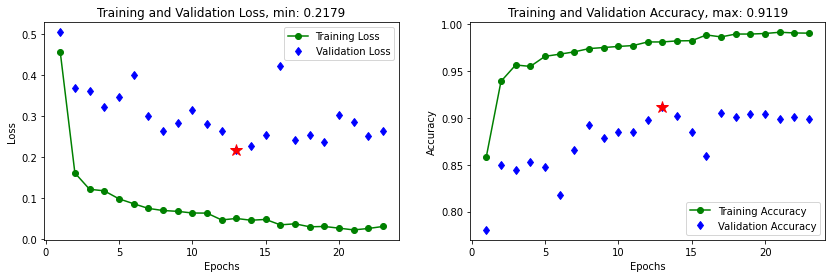

In [ ]:
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Overfitted!!  

---

In [ ]:
model.evaluate(test_data)

20/20 [==============================] - 5s 201ms/step - loss: 0.2621 - accuracy: 0.8990


[0.26213502883911133, 0.8990384340286255]

In [ ]:
pred = model.predict(test_data)

20/20 [==============================] - 5s 114ms/step


In [ ]:
pred.shape,pred[:10]

((624, 1), array([[0.9983413 ],
        [0.99982375],
        [0.88893723],
        [0.99993074],
        [0.9962573 ],
        [0.056595  ],
        [0.9999783 ],
        [0.9999852 ],
        [0.99977964],
        [0.9999999 ]], dtype=float32))

## CONFUSION MATRIX

In [ ]:
# Correct-handling with tf_dataset - test_data,unbatch()
from sklearn.metrics import confusion_matrix

y_test=[]
y_pred=[]
for images, labels in test_data.unbatch():   # 개개의 이미지에 대한 예측과 label에 수집
    # print(images.shape,labels.shape)
    y_pred0 = model.predict(np.expand_dims(images, axis=0), verbose=0) #, batch_size=1)  
    y_pred.append(np.round(y_pred0[0]))  #, axis=0)
    y_test.append(labels.numpy())
    # break

print(len(y_test),len(y_pred))
# print(y_test.shape,y_pred.shape)

print("정답=", y_test[0])
print("예측값=", y_pred[0]) #, np.round(y_pred0[0]))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)

624 624
정답= [1.]
예측값= [1.]
0.8990384615384616


array([[187,  47],
       [ 16, 374]])

In [ ]:
# Testing code
# y_pred0,len(y_test),len(y_pred), y_pred[:5], y_test[:5]

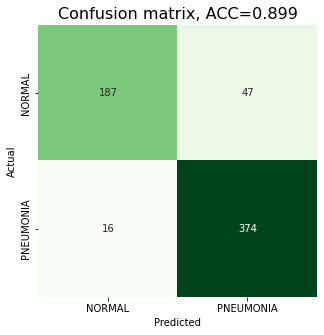

In [ ]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm, cbar=False, xticklabels=names, yticklabels=names, fmt='d', annot=True, cmap=plt.cm.Greens) #coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion matrix, ACC={round(acc,3)}', fontsize=16)
plt.show()

### 아래 코드 사용 금지!!!

In [ ]:
# 아래 코드를 사용하면 틀린 결과를 얻게됩니다. => 왜 사용 금지?
# Wrong-handling with tf_dataset - test_data를 사용할 때마다 다른 iterate가 생성됨.
from sklearn.metrics import confusion_matrix
y_pred0 = model.predict(test_data)
y_pred = list(np.round(y_pred0))  #, axis=0)
y_test = [labels.numpy() for _, labels in test_data.unbatch()]
print("정답=", y_test[0])
print("예측값=", y_pred[0], np.round(y_pred0[0]))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)

---
## **전이(전환)학습 방법**
1. 데이터 수집
2. 데이터세트 구성 (train,test,validation): tf.keras.preprocessing.image_dataset_from_directory
3. 데이터 증대 (Data augmentation)
4. 모델 구성: imagenet 모델 연결, 레이어 학습 조건 설정
5. 콜백 조건 설정
6. 모델 학습 및 테스트
    - steps_per_epoch = len(train_data)
    - validation_data = test_data
    - validation_steps = len(test_data)

> steps_per_epoch를 전체데이터의 길이로 설정: 학습 시간이 길어지나 작을 val_loss를 가진 모델을 구할 수 있디.
> validation_steps은 테스트데이터 길이의 25~100으로 조정 가능 %

---

# [DIY-예비실기평가] 위의 전이학습 코드에 다음 내용을 추가하시오.

1. EfficientNetB1 모델에 대한 전이학습에 Fine-Tuning을 적용하여 학습시키시오. 
- [hint] https://github.com/Redwoods/pdm/blob/main/project/cifar10/cifar10_100pct_TL123.ipynb
2. 모델을 학습시키면서 val_accuracy가 최대인 가중치 파일을 저장하시오.
3. 저장된 best model을 이용하여 혼동행렬을 구하고 혼동행렬을 그리시오.
4. 완성된 ipynb 파일을 chaos21c@gmail.com 으로 보내시오.
- 제출파일명 :  **pdmxx**_chest_xray_TL1_EfficientNetB1.ipynb

---
---

# [기말 실기 안내]

- 시간: 12월 14일(수) 오후 1시 (E507)

## 실기 내용
1. chest_xray_data를 Resnet50을 적용해서 전이학습을 시키시오.
```
base_model = keras.applications.resnet50.ResNet50(include_top = False)
```
- 다음 문제를 해결하시오.
```
# Check the grayscale input and output of base_model
ix=layers.Input(shape=(224,224,1))
print(base_model(ix))
```

> Error, Input 0 of layer "conv1_conv" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 230, 230, 1)

> [Hint] How to use grayscale image in ResNet50?

2. 모델을 학습시키면서 val_accuracy가 최대인 가중치 파일을 저장하시오.
3. 저장된 best model을 이용하여 혼동행렬을 구하고 혼동행렬을 그리시오.
4. 완성된 ipynb 파일을 chaos21c@gmail.com 으로 보내시오. (기말 실기 당일 실습실에서 제출.)
- 제출파일명 : pdmxx_chest_xray_TL2_Resnet50.ipynb
- 위의 코드를 미리 준비해서 각자의 google drive에 보관해서 사용.